In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

import datetime

col_list = ['Humidity']
dataframe = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/sensor_data.csv', usecols=col_list)
dataframe

,Humidity
0,46
1,46
2,46
3,46
4,46
...,...
933,48
934,48
935,48
936,48


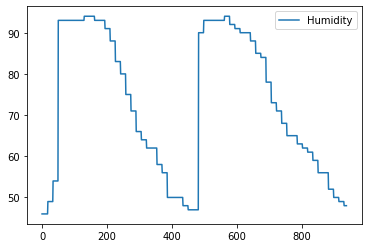

In [ ]:
import matplotlib.pyplot as plt
dataframe.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataframe)
scaled_data.shape

(938, 1)

In [ ]:
import math
training_data_len = math.ceil(len(scaled_data)*0.8)
train_data = scaled_data[0:training_data_len]

In [ ]:
x_train = []
y_train = []

PAST_SET = 10
for i in range(PAST_SET, len(train_data)):
  x_train.append(train_data[i-PAST_SET:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(741, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
x_train.shape[1]

10

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 3)
model.save('/content/gdrive/My Drive/Colab Notebooks/saved_model.h5')

Epoch 1/3
741/741 [==============================] - 5s 6ms/step - loss: 0.0025
Epoch 2/3
741/741 [==============================] - 5s 6ms/step - loss: 0.0028
Epoch 3/3
741/741 [==============================] - 5s 6ms/step - loss: 0.0026


In [ ]:
test_data = scaled_data[training_data_len - PAST_SET:, :]

x_test = []
y_test = dataframe.iloc[training_data_len:, :]
for i in range(PAST_SET, len(test_data)):
  x_test.append(test_data[i-PAST_SET:i, 0])

In [ ]:
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.45833333],
        [0.45833333],
        [0.45833333],
        ...,
        [0.45833333],
        [0.45833333],
        [0.45833333]],

       [[0.45833333],
        [0.45833333],
        [0.45833333],
        ...,
        [0.45833333],
        [0.45833333],
        [0.45833333]],

       [[0.45833333],
        [0.45833333],
        [0.45833333],
        ...,
        [0.45833333],
        [0.45833333],
        [0.45833333]],

       ...,

       [[0.0625    ],
        [0.0625    ],
        [0.0625    ],
        ...,
        [0.04166667],
        [0.04166667],
        [0.04166667]],

       [[0.0625    ],
        [0.0625    ],
        [0.0625    ],
        ...,
        [0.04166667],
        [0.04166667],
        [0.04166667]],

       [[0.0625    ],
        [0.0625    ],
        [0.0625    ],
        ...,
        [0.04166667],
        [0.04166667],
        [0.04166667]]])

In [ ]:
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

Humidity    0.196296
dtype: float64

In [ ]:
data = dataframe.filter(['Temperature'])
train = dataframe[:training_data_len]
valid = dataframe[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


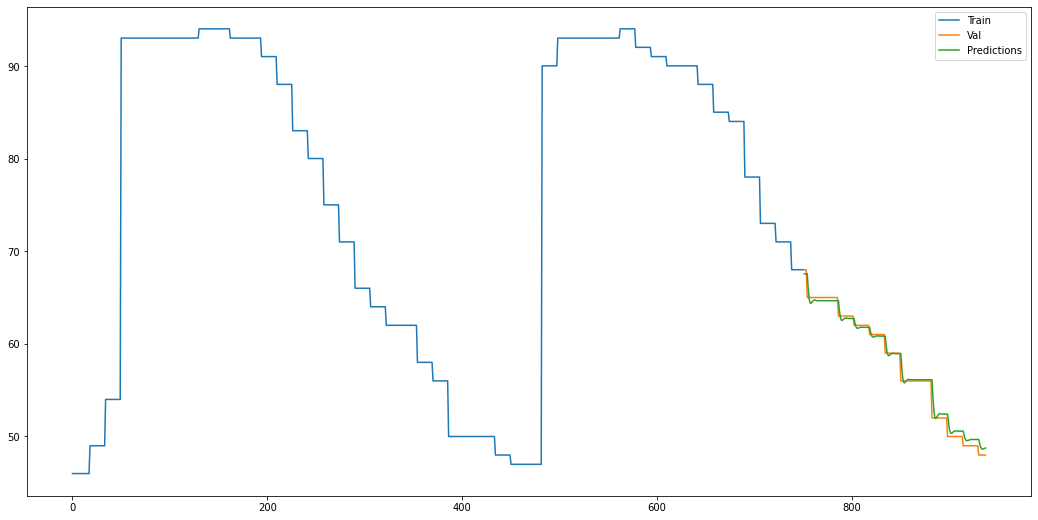

In [ ]:
plt.figure(figsize = (18,9))
plt.plot(train['Humidity'])
plt.plot(valid[['Humidity', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')